# Which avocado size is most popular?
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

pandas has been imported as pd, and avocados is available.

In [1]:
import pandas as pd 
avocados = pd.read_pickle('../datasets/avoplotto.pkl')

In [2]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

In [3]:
# Look at the first few rows of data
print(avocados.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


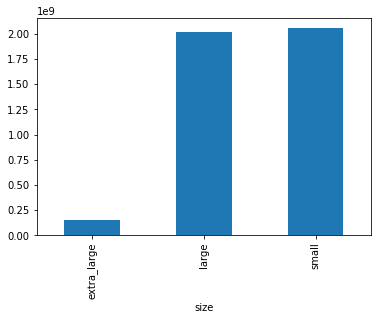

In [4]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

# Changes in sales over time
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

pandas has been imported as pd.

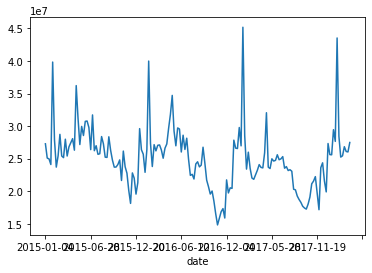

In [5]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')

# Show the plot
plt.show()

# Avocado supply and demand
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

matplotlib.pyplot has been imported as plt and pandas has been imported as pd.

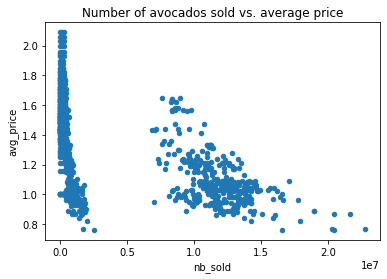

In [6]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x='nb_sold', y='avg_price',kind='scatter', title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

# Price of conventional vs. organic avocados
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

matplotlib.pyplot has been imported as plt and pandas has been imported as pd.

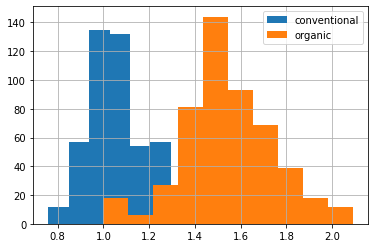

In [7]:
# # Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

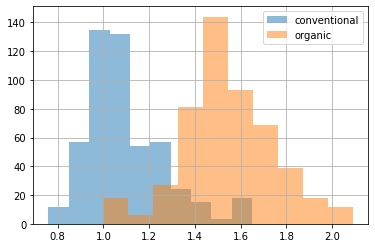

In [8]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

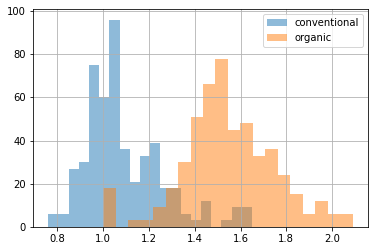

In [9]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

# Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

pandas has been imported as pd and avocados_2016, a subset of avocados that contains only sales from 2016, is available.

.isna() .any()

     date  avg_price  total_sold  small_sold  large_sold  xl_sold  \
0   False      False       False       False       False    False   
4   False      False       False       False       False     True   
8   False      False       False       False       False    False   
9   False      False       False       False       False    False   
13  False      False       False       False       False    False   
17  False      False       False       False       False    False   
18  False      False       False       False       False    False   
21  False      False       False       False       False    False   
22  False      False       False       False       False    False   
26  False      False       False       False       False    False   
30  False      False       False       False       False     True   
31  False      False       False       False       False    False   
35  False      False       False       False       False    False   
39  False      False       False  

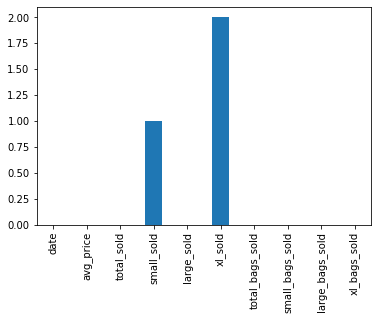

In [10]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

avocados_2016 = pd.read_csv('../datasets/avocados_2016.csv')
avocados_2016 = avocados_2016[avocados_2016['date'] >= "2010"]

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

# Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

pandas has been imported as pd and avocados_2016 is available.

.dropna()

In [11]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


# Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

dogs[["height_cm", "weight_kg"]].hist()
pandas has been imported as pd and matplotlib.pyplot has been imported as plt. The avocados_2016 dataset is available.

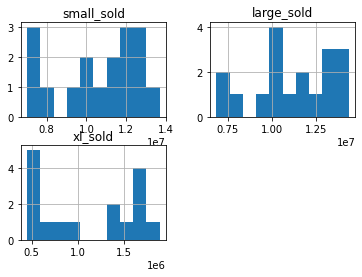

In [12]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

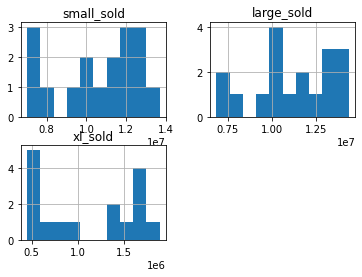

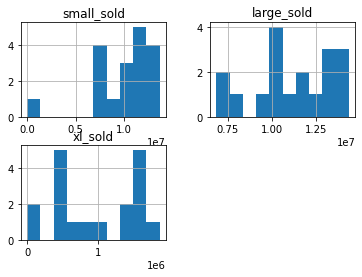

In [13]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

# List of dictionaries
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

|date | small_sold |large_sold |
|----|----|----|
|"2019-11-03" | 10376832 |	7835071 |
|"2019-11-10" |	10717154 |	8561348|

pandas as pd is imported.

In [14]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


# Dictionary of lists
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

|date | small_sold |large_sold |
|----|----|----|
|"2019-11-17" | 10859987 |	7674135 |
|"2019-12-01" |	9291631 |	6238096 |

pandas as pd is imported.

In [15]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


# CSV to DataFrame
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

pandas is imported for you as pd. "airline_bumping.csv" is in your working directory.

In [16]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv('../datasets/airline_bumping.csv')

# Take a look at the DataFrame
print(airline_bumping.head())

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


In [17]:
# From previous step
airline_bumping = pd.read_csv('../datasets/airline_bumping.csv')
print(airline_bumping.head())

# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby('airline')[['nb_bumped', 'total_passengers']].sum()

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


In [18]:
# From previous steps
airline_bumping = pd.read_csv('../datasets/airline_bumping.csv')
print(airline_bumping.head())
airline_totals = airline_bumping.groupby('airline')[['nb_bumped', 'total_passengers']].sum()

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals['bumps_per_10k'] = airline_totals['nb_bumped'] / airline_totals['total_passengers'] * 10000

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734


In [19]:
# From previous steps
airline_bumping = pd.read_csv('../datasets/airline_bumping.csv')
print(airline_bumping.head())
airline_totals = airline_bumping.groupby('airline')[['nb_bumped', 'total_passengers']].sum()
airline_totals['bumps_per_10k'] = airline_totals['nb_bumped'] / airline_totals['total_passengers'] * 10000

# Print airline_totals
print(airline_totals)

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734
                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
ALASKA AIRLINES           1392          36543121       0.380920
AMERICAN AIRLINES        11115         197365225       0.563169
DELTA AIR LINES           1591         197033215       0.080748
EXPRESSJET AIRLINES       3326          27858678       1.193883
FRONTIER AIRLINES         1228          22954995       0.534960
HAWAIIAN AIRLINES          122          16577572       0.073593
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
SOUTHWEST AIRLINES      

# DataFrame to CSV
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

pandas as pd has been imported for you.

In [20]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k', ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv('../datasets/airline_totals_sorted.csv')

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
EXPRESSJET AIRLINES       3326          27858678       1.193883
SPIRIT AIRLINES           2920          32304571       0.903897
SOUTHWEST AIRLINES       18585         228142036       0.814624
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
AMERICAN AIRLINES        11115         197365225       0.563169
FRONTIER AIRLINES         1228          22954995       0.534960
ALASKA AIRLINES           1392          36543121       0.380920
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365
DELTA AIR LINES           1591         197033215       0.080748
HAWAIIAN AIRLINES          122          16577572       0.073593
